In [159]:
import ase
import ase.io
from ase.io import xsf
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
%matplotlib inline

In [160]:
dataframe_df2 = pd.read_pickle("DataFrame_df2.pkl")
dataframe_df2.head()

,uuid,structure,cell,volume,relevant_dimension_of_highest_dimensionality_substructure,binding_energy_per_substructure,binding_energy,label,number_of_atoms_in_bulk,number_of_highest_dimensionality_substructures_in_bulk,sub_structure_spg,sub_structure_dim,energy_bulk,sub_structure_formula,PMG Structure from ASE Atoms
0,dec2d070-d2ad-41f3-b742-786368ade33a,"(Atom('Cd', [-0.0, -0.0, 29.0441583], index=0)...","[[2.1044124705, 1.2149831063, 34.279850741], [...",525.885600,15.340954,-0.165000,10.755509,EE,15,5,"[C2/m (12), C2/m (12), C2/m (12), C2/m (12), C...","[2, 2, 2, 2, 2]",-17198.871453,"[CdI2, CdI2, CdI2, CdI2, CdI2]","[[ 0. 0. 29.0441583] Cd, [ 0. ..."
1,51e630e8-d94f-421c-bd1e-3e2f298e740c,"(Atom('Fe', [0.0, 0.0, 0.0], index=0), Atom('C...","[[3.35814166734363, 3.21879556184565e-14, -3.2...",52.188194,9.766268,-0.149888,15.347484,EE,3,1,[P-3m1 (164)],[2],-5361.474444,[Cl2Fe],"[[0. 0. 0.] Fe, [0. 2.06980071 4.36433..."
2,527e7b32-d211-4743-9631-120122819190,"(Atom('Er', [2.1386, 4.301805, 3.209025], inde...","[[2.14789490163679, -12.5878501270869, 0.0], [...",232.520056,18.471785,-0.454048,24.580650,EE,8,1,[P2_1/m (11)],[2],-26090.090963,[Er2Te6],"[[2.1386 4.301805 3.209025] Er, [ 2.1386 -..."
3,37bf14b1-6529-436c-a519-e1ad9b208784,"(Atom('Ba', [0.0, 0.0, 9.5697], index=0), Atom...","[[-2.0745739339, 2.0745739339, 7.4278571834], ...",127.873741,17.215428,-0.747937,43.445746,PE,3,1,[C2/m (12)],[2],-2866.173187,[Ba2Hg],"[[0. 0. 9.5697] Ba, [0. 0. 5.6..."
4,e7a9cec3-f11a-4d16-a8c5-ebd758bb6592,"(Atom('Ba', [0.0, 2.414, 1.49473], index=0), A...","[[4.6829418165, 0.0, 0.0], [0.0, 4.6829418165,...",166.823529,21.929944,-0.532853,24.297979,EE,6,1,[P4/nmm (129)],[2],-3217.539658,[Ba2H2I2],"[[0. 2.414 1.49473] Ba, [2.414 0. ..."


In [161]:
structures = list(dataframe_df2["PMG Structure from ASE Atoms"])
gridpoints = list(dataframe_df2.index)

In [162]:
features = {n:{} for n in gridpoints}
for name in gridpoints:
    features[name]["structure"]=dataframe_df2["PMG Structure from ASE Atoms"][name]

In [163]:
data=pd.DataFrame.from_dict(features).T
data

,structure
0,"[[ 0. 0. 29.0441583] Cd, [ 0. ..."
1,"[[0. 0. 0.] Fe, [0. 2.06980071 4.36433..."
2,"[[2.1386 4.301805 3.209025] Er, [ 2.1386 -..."
3,"[[0. 0. 9.5697] Ba, [0. 0. 5.6..."
4,"[[0. 2.414 1.49473] Ba, [2.414 0. ..."
...,...
2387,"[[0. 2.87064327 2.285 ] Li, [2.486..."
2388,"[[ 8.7759233 -1.51816627 6.20947541] K, [ 2...."
2389,"[[6.06416256 0.5661043 0.86358119] Li, [4.004..."
2390,"[[0. 0. 2.4314841] Sc, [ 0. ..."


In [165]:
features_dict={}
## 1. initialize the dictionary for each site
for index,row in data.iterrows():
    structure=row["structure"]
    features_dict[index]={}

In [175]:
#features_dict

In [176]:
from matminer.featurizers.structure import BondFractions

In [177]:
### Bond Fractions
BD = BondFractions()
BD.fit(list(data['structure']))
colnames=BD._generate_column_labels(multiindex=False,return_errors=False)
for index,row in data.iterrows():
    structure=row["structure"]
    feat=BD.featurize(structure)
    features_dict[index].update(dict(zip(colnames, feat)))

/Users/mohammad/anaconda3/lib/python3.7/site-packages/pymatgen/analysis/local_env.py:4136: UserWarning: No oxidation states specified on sites! For better results, set the site oxidation states in the structure.
  "No oxidation states specified on sites! For better results, set "
/Users/mohammad/anaconda3/lib/python3.7/site-packages/pymatgen/analysis/local_env.py:3939: UserWarning: CrystalNN: cannot locate an appropriate radius, covalent or atomic radii will be used, this can lead to non-optimal results.
  "CrystalNN: cannot locate an appropriate radius, "


In [178]:
from matminer.featurizers.structure import BagofBonds

In [179]:
###Bag of Bonds vector
BB = BagofBonds()
BB.fit(list(data['structure']))
colnames=BB._generate_column_labels(multiindex=False,return_errors=False)
for index,row in data.iterrows():
    structure=row["structure"]
    feat=BD.featurize(structure)
    features_dict[index].update(dict(zip(colnames, feat)))

/Users/mohammad/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:270: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ar = np.asanyarray(ar)


In [180]:
df_features=pd.DataFrame.from_dict(features_dict).T.astype(float)
df_features.head()

,Ag - Ag bond frac.,Ag - As bond frac.,Ag - Au bond frac.,Ag - B bond frac.,Ag - Bi bond frac.,Ag - Br bond frac.,Ag - C bond frac.,Ag - Cl bond frac.,Ag - Cr bond frac.,Ag - Cu bond frac.,...,Mn site #0,Mn site #1,Mn site #2,Mn site #3,Mn site #4,Mn site #5,Mn site #6,Mn site #7,Mn - Tl bond #0,Mn - Tl bond #1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [328]:
df_features.to_pickle("Features_BondFractions_BagofBonds.pkl")

In [329]:
df_features = pd.read_pickle("Features_BondFractions_BagofBonds.pkl")

In [330]:
df = df_features.copy()

In [332]:
features_MultipleFeaturizer = pd.read_pickle("features_MultipleFeaturizer.pkl")

In [333]:
df = pd.concat([df, features_MultipleFeaturizer], axis = 1)

In [334]:
X = np.array(df.drop('label', axis = 1))
y = df['label']
print('Input data shape:', X.shape)

Input data shape: (2392, 2949)


In [336]:
import pandas as pd
failed = np.any(pd.isnull(X), axis=1)
print('Number failed: {}/{}'.format(np.sum(failed), len(failed)))

Number failed: 179/2392


In [337]:
model = Pipeline([
    ('imputer', SimpleImputer()), # For the failed structures
    ('model', RandomForestClassifier(n_estimators=1000, n_jobs=-1))
])

In [338]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [339]:
model.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('model',
                 RandomForestClassifier(n_estimators=1000, n_jobs=-1))])

In [340]:
predictions = model.predict(X_test)

In [341]:
from sklearn.metrics import classification_report, confusion_matrix

In [342]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

          EE       0.82      0.85      0.83       341
         HBE       0.74      0.69      0.71       167
          PE       0.65      0.65      0.65       210

    accuracy                           0.75       718
   macro avg       0.74      0.73      0.73       718
weighted avg       0.75      0.75      0.75       718



[[289  15  37]
 [ 17 115  35]
 [ 48  26 136]]


***In case of binary classification***

In [343]:
df = df.dropna()

In [344]:
df.replace(to_replace='PE', value='EE', inplace=True)
df.replace(to_replace='EE', value=1, inplace=True)
df.replace(to_replace='HBE', value=0, inplace=True)

In [345]:
X = df.drop('label', axis = 1).values
y = df['label'].values

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

***Logestic Regression***

In [347]:
from sklearn.linear_model import LogisticRegression

In [348]:
logmodel = LogisticRegression()

In [349]:
logmodel.fit(X_train,y_train)

/Users/mohammad/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [352]:
predictions = logmodel.predict(X_test)

***Evaluation Logestic Regression***

In [353]:
from sklearn.metrics import classification_report

In [359]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.58      0.61      0.59       139
           1       0.90      0.88      0.89       525

    accuracy                           0.83       664
   macro avg       0.74      0.75      0.74       664
weighted avg       0.83      0.83      0.83       664



[[ 85  54]
 [ 62 463]]


***Decision Tree***

In [355]:
from sklearn.tree import DecisionTreeClassifier

In [356]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [357]:
predictions = dtree.predict(X_test)

In [358]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print("\n")
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.58      0.61      0.59       139
           1       0.90      0.88      0.89       525

    accuracy                           0.83       664
   macro avg       0.74      0.75      0.74       664
weighted avg       0.83      0.83      0.83       664



[[ 85  54]
 [ 62 463]]


***Random Forest Model***

In [310]:
from sklearn.ensemble import RandomForestClassifier

In [311]:
RF = RandomForestClassifier(n_estimators=600)
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [313]:
pred_RF = RF.predict(X_test)

In [314]:
print(classification_report(y_test, pred_RF))
print("\n")
print(confusion_matrix(y_test, pred_RF))

              precision    recall  f1-score   support

           0       0.88      0.50      0.64       139
           1       0.88      0.98      0.93       525

    accuracy                           0.88       664
   macro avg       0.88      0.74      0.78       664
weighted avg       0.88      0.88      0.87       664



[[ 69  70]
 [  9 516]]


***Neural Network***

In [315]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [316]:
X.shape

(2213, 2949)

In [317]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [361]:
model = Sequential()

In [362]:
model.add(Dense(units=2949,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=2000,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1500,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1000,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [363]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
49/49 [==============================] - 6s 104ms/step - loss: 12.4090 - val_loss: 0.5318
Epoch 2/600
49/49 [==============================] - 5s 103ms/step - loss: 0.5773 - val_loss: 0.5074
Epoch 3/600
49/49 [==============================] - 6s 115ms/step - loss: 0.5357 - val_loss: 0.4985
Epoch 4/600
49/49 [==============================] - 6s 113ms/step - loss: 0.5124 - val_loss: 0.4675
Epoch 5/600
49/49 [==============================] - 5s 107ms/step - loss: 0.5131 - val_loss: 0.4592
Epoch 6/600
49/49 [==============================] - 5s 107ms/step - loss: 0.4897 - val_loss: 0.4341
Epoch 7/600
49/49 [==============================] - 5s 107ms/step - loss: 0.4672 - val_loss: 0.4161
Epoch 8/600
49/49 [==============================] - 5s 109ms/step - loss: 0.4700 - val_loss: 0.4428
Epoch 9/600
49/49 [==============================] - 5s 107ms/step - loss: 0.4572 - val_loss: 0.4231
Epoch 10/600
49/49 [==============================] - 5s 105ms/step - loss: 0.4518 - val_l

<AxesSubplot:>

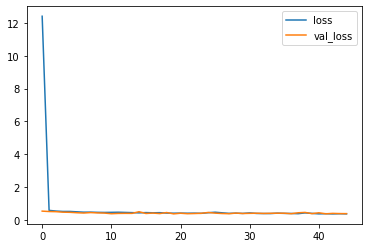

In [364]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [365]:
predictions = model.predict(X_test)

In [366]:
y_test.shape

(664,)

In [367]:
predictions = predictions.reshape(len(y_test))
predictions.shape

(664,)

In [368]:
pred = [round(i) for i in predictions]

In [369]:
print(classification_report(y_test, pred))
print("\n")
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

           0       0.69      0.50      0.58       139
           1       0.88      0.94      0.91       525

    accuracy                           0.85       664
   macro avg       0.79      0.72      0.75       664
weighted avg       0.84      0.85      0.84       664



[[ 70  69]
 [ 31 494]]
